<a href="https://colab.research.google.com/github/mojtaba732/ML_Practice/blob/main/GoldPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_excel('Data.xlsx', sheet_name='Sheet1')

df.tail()

,USD,OIL,SandP500,BTC,Interest,Gold
952,95.41,80.88,4682.80,63557.87,0.08,1866.1
953,95.92,80.76,4700.90,60161.25,0.08,1853.6
954,95.83,78.36,4688.67,60368.01,0.08,1869.7
955,95.54,79.01,4704.54,56942.14,0.08,1861.0
956,96.07,76.10,4697.96,58119.58,0.08,1851.2


In [ ]:
df.head()

,USD,OIL,SandP500,BTC,Interest,Gold
0,89.55,64.15,2648.94,6955.27,1.42,1333.0
1,89.59,63.39,2695.14,7754.00,1.42,1326.1
2,90.26,61.79,2681.66,7621.30,1.42,1311.6
3,90.23,61.15,2581.00,8265.59,1.42,1316.9
4,90.44,59.20,2619.55,8736.98,1.42,1313.1


In [ ]:
y = df.iloc[:, 5].values
X = df.iloc[:, [0,1,2,3,4]].values

Text(0, 0.5, 'Gold')

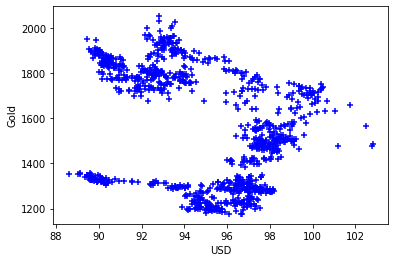

In [ ]:
plt.scatter(X[:, 0], y,color='blue', marker='+',label='USD vs Gold')
plt.xlabel('USD')
plt.ylabel('Gold')

Text(0, 0.5, 'Gold')

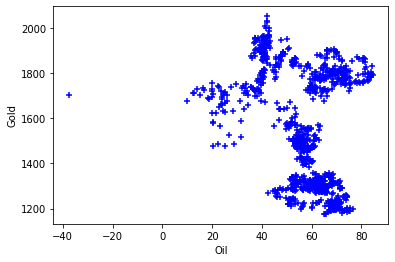

In [ ]:
plt.scatter(X[:, 1], y,color='blue', marker='+',label='Oil vs Gold')
plt.xlabel('Oil')
plt.ylabel('Gold')

Text(0, 0.5, 'Gold')

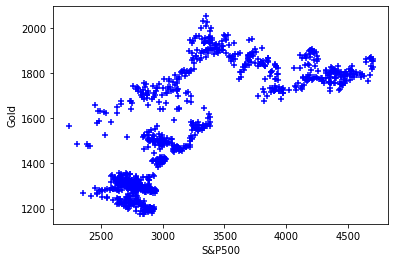

In [ ]:
plt.scatter(X[:, 2], y,color='blue', marker='+',label='S&P500 vs Gold')
plt.xlabel('S&P500')
plt.ylabel('Gold')

Text(0, 0.5, 'Gold')

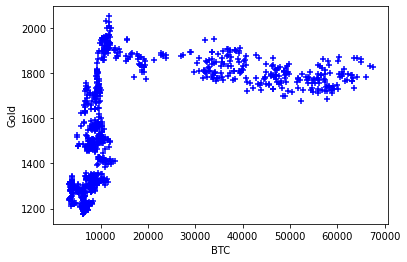

In [ ]:
plt.scatter(X[:, 3], y,color='blue', marker='+',label='BTC vs Gold')
plt.xlabel('BTC')
plt.ylabel('Gold')

Text(0, 0.5, 'Gold')

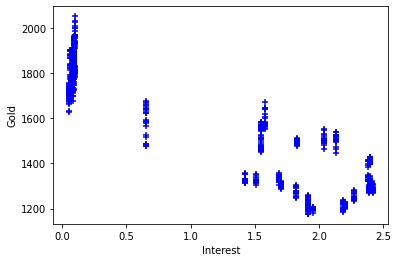

In [ ]:
plt.scatter(X[:, 4], y,color='blue', marker='+',label='Interest vs Gold')
plt.xlabel('Interest')
plt.ylabel('Gold')

In [ ]:
nX = np.array(X)
ny = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(nX, ny, test_size = 0.3)

In [ ]:
#Normalizing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [ ]:
#Linear Regression
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9195181157743946


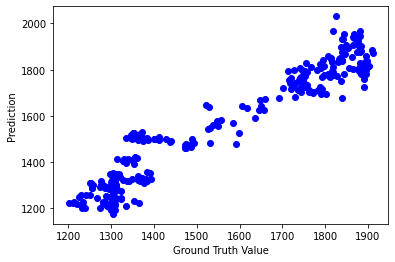

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(y_pred, y_test, color ='b')
plt.xlabel('Ground Truth Value')
plt.ylabel('Prediction')
plt.show()

In [ ]:
regr.coef_

array([-7.04012560e+00, -7.52576952e+00,  3.29736904e-01, -3.51788443e-03,
       -9.61542834e+01])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error: ", mse )

Mean Square Error:  4718.38084468849


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae )

Mean Absolute Error:  53.657247032978226


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Error: ", r2 )

R2 Error:  0.9195181157743946


In [ ]:
#SVR
#Kernel: Linear
svrclf = SVR(C=100.0, epsilon=0.1)
svrclf.fit(X_train, y_train)
print(svrclf.score(X_test, y_test))

0.6226948298003876


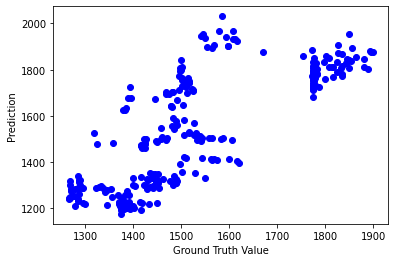

In [ ]:
y_pred = svrclf.predict(X_test)
plt.scatter(y_pred, y_test, color ='b')
plt.xlabel('Ground Truth Value')
plt.ylabel('Prediction')
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error: ", mse )

Mean Square Error:  22120.126843469036


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae )

Mean Absolute Error:  111.93257410769993


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 Error: ", r2 )

R2 Error:  0.6226948298003876


In [ ]:
#@title Default title text
#Decision Tree
DTregressor = DecisionTreeRegressor(random_state=0)
DTregressor.fit(X_train, y_train)
print(DTregressor.score(X_test, y_test))

0.9698576986101296


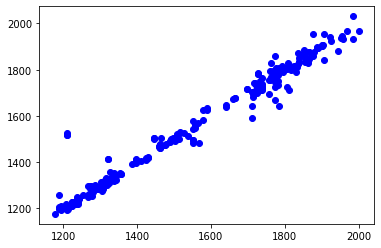

In [ ]:
y_pred = DTregressor.predict(X_test)
plt.scatter(y_pred, y_test, color ='b')
plt.show()

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 14.8 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
rexplainer = shap.explainers.Linear(regr,X_test)
shap_values  = rexplainer.shap_values(X_test)

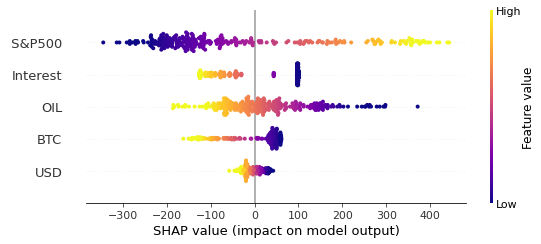

In [ ]:
shap.initjs()
shap.summary_plot(shap_values , X_test,feature_names=["USD","OIL"," S&P500","BTC","Interest"],cmap = "plasma")